# Intro to Atmospheric Science HW 1
## - *Kade Jimenez*

## Problem 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

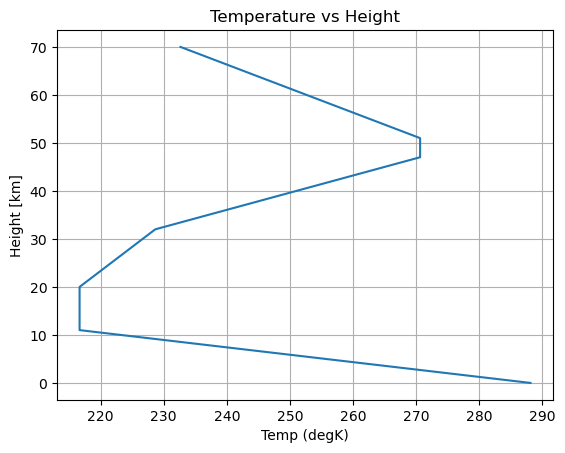

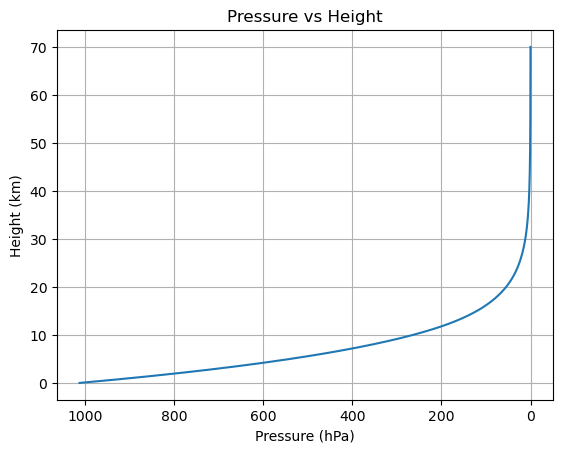

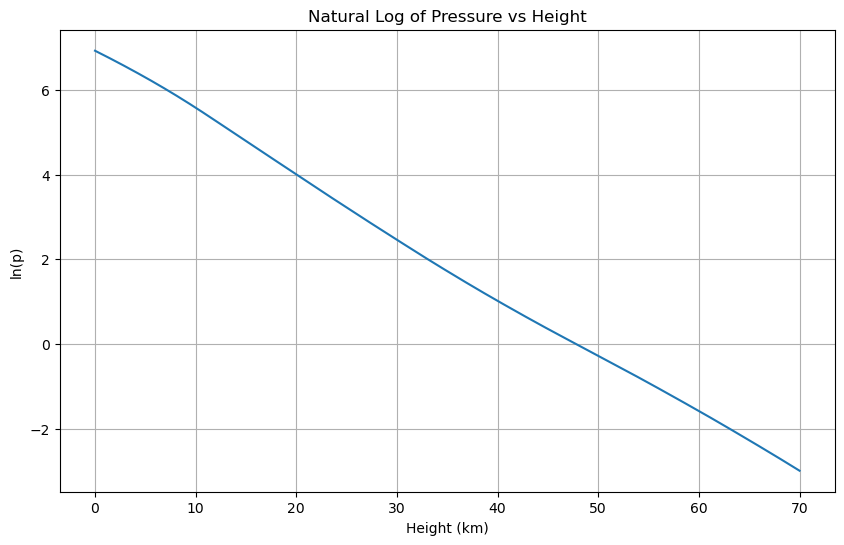

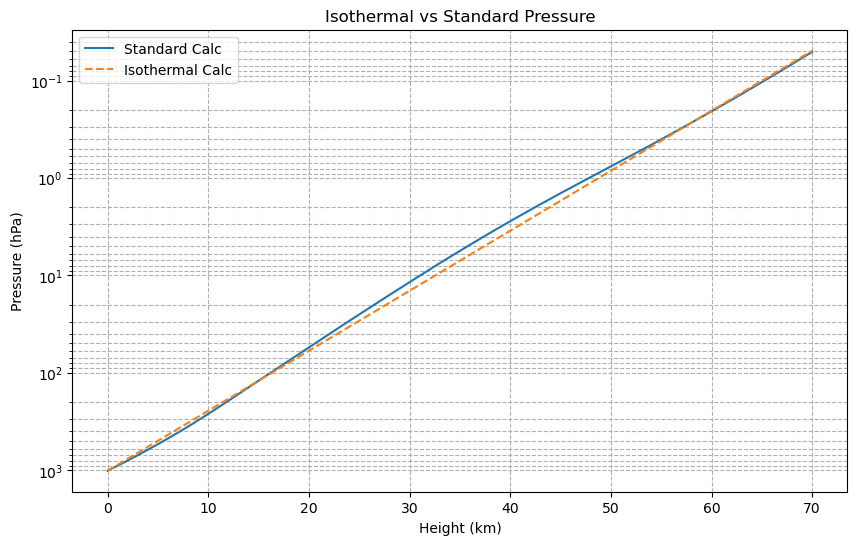

In [41]:
#given
g = 9.81
R_sp = 8.31432 / 0.0289644  # spec. gas const. / molar mass of atmosphere
p0 = 1013.25  # hPa
z_max = 70000
T0 = 288.15  #sea level temp


#piecewise temp calc
def T_z(z): 
    if z < 11000: 
        return T0 - 6.5 * z / 1000  
    elif z < 20000: 
        return 216.65  #dT/dz = 0
    elif z < 32000: 
        return 216.65 + 1.0 * (z - 20000) / 1000  
    elif z < 47000: 
        return 228.65 + 2.8 * (z - 32000) / 1000  
    elif z < 51000: 
        return 270.65  #dT/dz = 0
    elif z <= 70000: 
        return 270.65 - 2.0 * (z - 51000) / 1000 
calcT = np.vectorize(T_z)


#pressure function
def dP_dz(z, P):
    T = T_z(z)
    return -P * g / (R_sp * T)

#create inputs
z_points = np.linspace(0, z_max, 1000)  # 0 to 70 km
T_points = np.linspace(0, z_max, 1000)  # 0 to 70 km

# calculate T & p
T = calcT(T_points)
sol = solve_ivp(dP_dz, [0, z_max], [p0], t_eval=z_points, method='RK45')
p = sol.y[0]  # hPa
z = sol.t 
z_km = z / 1000 #convert z to km

#T vs. z plot
plt.plot(T, z_km)
plt.xlabel('Temp (degK)')
plt.ylabel('Height [km]')
plt.title('Temperature vs Height')
plt.grid(True)
plt.show()

#p vs z plot
plt.plot(p, z_km)
plt.xlabel('Pressure (hPa)')
plt.ylabel('Height (km)')
plt.title('Pressure vs Height')
plt.grid(True)
plt.gca().invert_xaxis()  # Higher pressure at lower altitude
plt.show()

#ln(p) vs z plot
plt.figure(figsize=(10, 6))
plt.plot(z_km, np.log(p))
plt.xlabel('Height (km)')
plt.ylabel('ln(p)')
plt.title('Natural Log of Pressure vs Height')
plt.grid(True)
plt.show()

#calculate mean & using for isothermal pres
T_mean = np.mean(temperature_vectorized(z))
p_iso = p0 * np.exp(-g / (R_sp * T_mean) * z)

#ln(p) vs ln(isothermal p)
plt.figure(figsize=(10, 6))
plt.plot(z_km, p, label='Standard Calc')
plt.plot(z_km, p_iso, '--', label='Isothermal Calc')
plt.xlabel('Height (km)')
plt.ylabel('Pressure (hPa)')
plt.title('Isothermal vs Standard Pressure')
plt.yscale('log')
plt.gca().invert_yaxis()  # Higher pressure at lower altitude
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

1. 
   Pressure is explained by the hydrostatic balance equation ($\frac{dp}{dz} = -\rho*g$) in conjunction with the ideal gas law (p = $\rho *R*T$). When solved for p it results in a differential equation with a log term. If you take the log of pressure, it then results in the solved differential equation turning in an almost linear form. From a physical standpoint, the further away from the surface of the earth the less gravity affects it, changing the ideal gas equation. The variations occur from the piecewise rate of change of temperature. 

2.
  In an isothermal atmosphere, where the temperature T is constant with height, the pressure profile follows a perfect exponential decay. While the actual pressure profile is almost perfect exponencial decay, it varies slightly due to the temperature term in the ideal gas law. Finding pressure by using an isothermal calculation eliminates those variations, resulting in the perfect exponential that becomes linear when it is plotted as the $log(p)$

4.
  The closeness of the isothermal and standard calculations indicate that the temperature variations do have an impact, but the change in pressure is dominated by the change in height term of the equation. 

## Problem 2

Hypsometric Equation:

$z_2 - z_1 = -(\frac{R_d}{g}) log(\frac{p_2}{p_1})*T$

- ignoring virtual temperature correction

Allows us to calculate the thickness of layer between the different pressure heights. Since we know that both zones have the same pressure difference, we can assume that delta z is the same in both cases, allowing us to calcualate for $T_{inside}$

$T_{in} = T_{out} * \frac{log(\frac{p_{out}}{p_{low}})}{log(\frac{p_{in}}{p_{low}})}$



In [28]:
p1 = 1010
p2 = 940
p_flat = 200
R = 287 #dry air
t_out = -3 +273.15 #degK

t_in = t_out * ((np.log(p1/p_flat)) / (np.log(p2/p_flat)))

t_in

282.6882477832986

$T_{in} = 282.7$ degrees Kelvin

## Problem 3

$ Using: \frac{T_v}{T} = \frac{1}{1 - \frac{e}{p}(1 - \epsilon)} $

In [29]:
e = 1
p = 100
ep = 0.622

ratio = 1 / (1 - (e/p) * (1-ep))
ratio

1.003794342615085

$\frac{T_v}{T} = 1:0.99622$

## Problem 4

Equation for molar mass of a mixed gas
$
M = \sum (y_i \cdot M_i)
$


In [39]:
R_star = 8.314 #J/mol*K

M_CO2 = 44.0 
M_N2 = 28.0
y_CO2 = 0.95
y_N2 = 0.05

M_avg = (y_CO2 * M_CO2) + (y_N2 * M_N2)
M_avg_kg = M_avg / 1000.0  #g/mol to kg/mol
R = R_star / M_avg_kg #divide to get specific gas const. 

print(f"The specific gas constant for the Venusian atmosphere is ~{R:.2f} J/(kg·K).")


The specific gas constant for the Venusian atmosphere is ~192.45 J/(kg·K).
